# Problem Statement : 
## Consider only the below columns and prepare a prediction model for predicting Price.
#### Price  -- Offer Price in EUROs	
#### Age_08_04 -- Age in months as in August 2004	
#### KM -- Accumulated Kilometers on odometer
#### HP -- Horse Power
#### cc -- Cylinder Volume in cubic centimeters
#### Doors -- Number of doors
#### Gears -- Number of gear positions
#### Quarterly_Tax -- Quarterly road tax in EUROs
#### Weight -- Weight in Kilograms


#### Import relevant libraries.

In [255]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('pastel')

import statsmodels.formula.api as smf

#### Load data and get insight.

In [256]:
data = pd.read_csv('ToyotaCorolla.csv',encoding='iso-8859-1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


#### We need only some of the columns here to perform prediction of price.

In [257]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [258]:
col = ['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
data = data[col]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


#### EDA, Explore the data. 

In [259]:
data.shape

(1436, 9)

In [260]:
data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64


<AxesSubplot: >

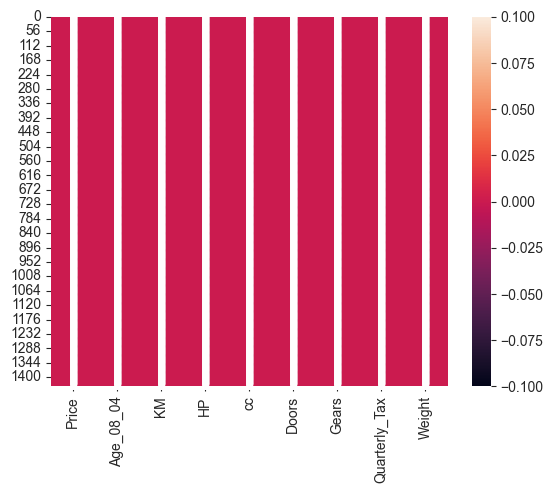

In [261]:
print(data.isnull().sum())
sns.heatmap(data.isnull(),annot=True)

In [262]:
print(data.nunique()) # make it's bar plot

Price             236
Age_08_04          77
KM               1263
HP                 12
cc                 13
Doors               4
Gears               4
Quarterly_Tax      13
Weight             59
dtype: int64


In [263]:
# We have 2 categorical column no. of doors and no. of gears, Other columns are numerical
num_columns = ['Price','Age_08_04','KM','HP','cc','Quarterly_Tax','Weight']
cat_columns =['Doors', 'Gears']

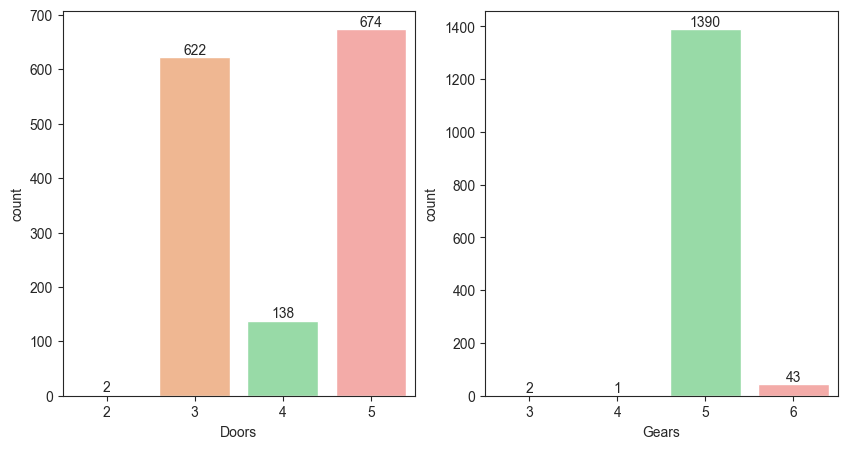

In [264]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i in range(len(cat_columns)):
    sns.countplot(x=data[cat_columns[i]], ax=axes[i])
    axes[i].bar_label(axes[i].containers[0]);

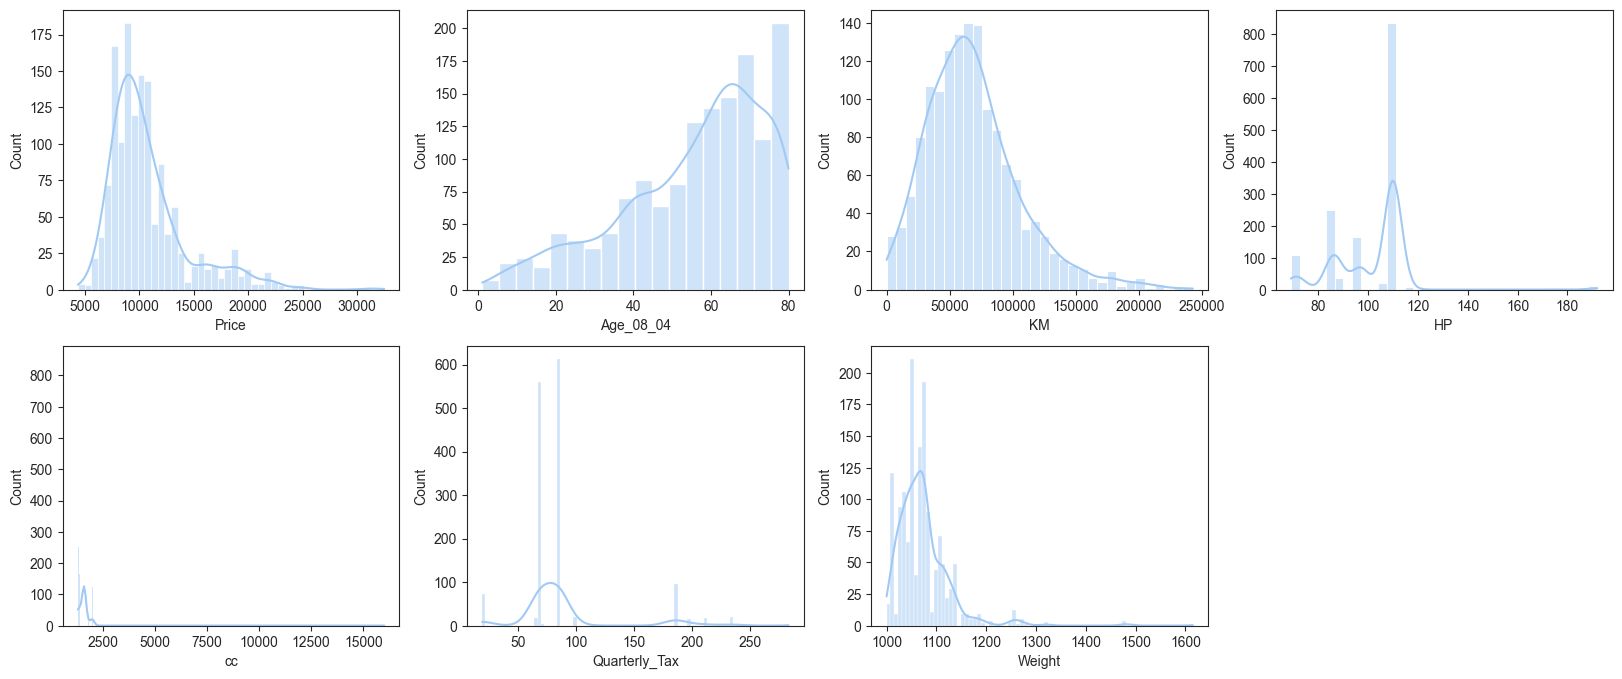

In [265]:
# Check Distribution of data
plt.figure(figsize=(20,8))
for i in range(len(num_columns)):
    plt.subplot(2,4,i+1)
    sns.histplot(data=data, x=num_columns[i], kde=True)

#### Data Preprocessing & Data Visualization

In [266]:

data[num_columns].describe()

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,283.000000,1615.00000


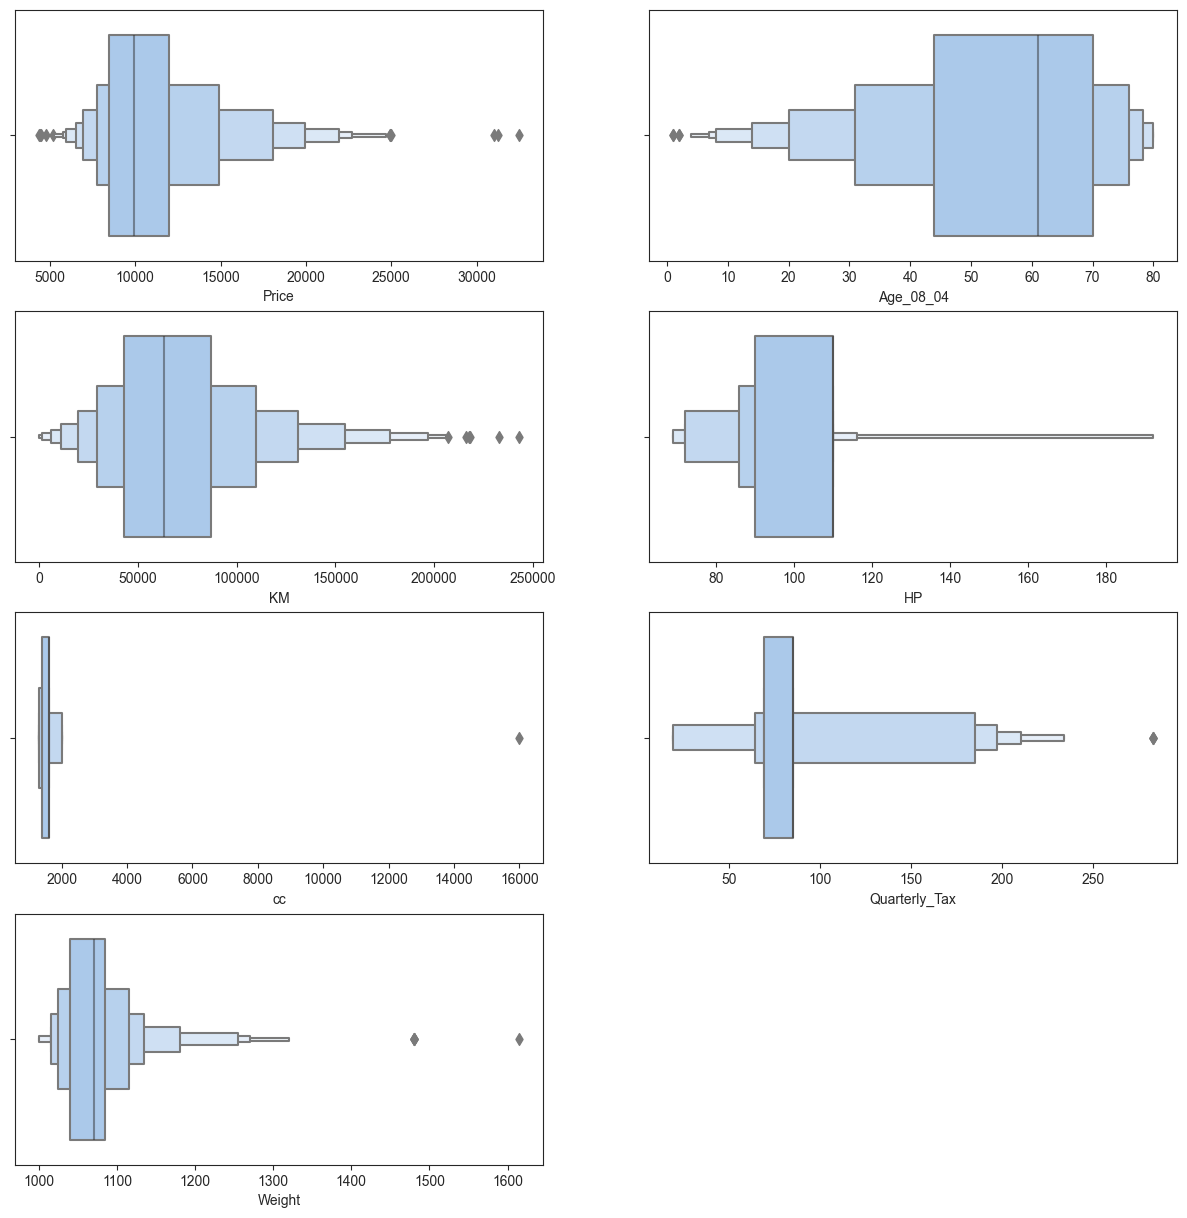

In [267]:
plt.figure(figsize=(15,15))
for i in range(len(num_columns)):
    plt.subplot(4,2,i+1)
    sns.boxenplot(data=data, x=num_columns[i])

In [268]:
# Check the index of the outliers

print(f"Outlier Index of Price column : {data[data['Price']>27000].index}")
print(f"Outlier Index of Quarterly_Tax column : {data[data['Quarterly_Tax']>250].index}")
print(f"Outlier Index of Weight column : {data[data['Weight']>1400].index}")
print(f"Outlier Index of KM column : {data[data['KM']>220000].index}")
print(f"Outlier Index of cc column : {data[data['cc']>14000].index}")

Outlier Index of Price column : Int64Index([109, 110, 111], dtype='int64')
Outlier Index of Quarterly_Tax column : Int64Index([109, 110, 111], dtype='int64')
Outlier Index of Weight column : Int64Index([109, 110, 111, 221, 960], dtype='int64')
Outlier Index of KM column : Int64Index([186, 1044], dtype='int64')
Outlier Index of cc column : Int64Index([80], dtype='int64')


In [269]:
# Drop Outliers

data.drop(data[data['KM']>220000].index, axis=0, inplace=True)
data.drop(data[data['cc']>14000].index, axis=0, inplace=True)
data.drop(data[data['Weight']>1400].index, axis=0, inplace=True)

In [270]:
# Pir plot and it's correlation coefficient.

#from scipy.stats import pearsonr
#def reg_coef(x,y,label=None,color=None,**kwargs):
    #ax = plt.gca()
    #r,p = pearsonr(x,y)
    #ax.annotate('r = {:.2f}'.format(r), xy=(1,1), xycoords='axes fraction', ha='center')
    #ax.set_axis_off()

#g = sns.PairGrid(data)
#g.map_diag(sns.histplot)
#g.map_lower(sns.scatterplot)
#g.map_upper(reg_coef)

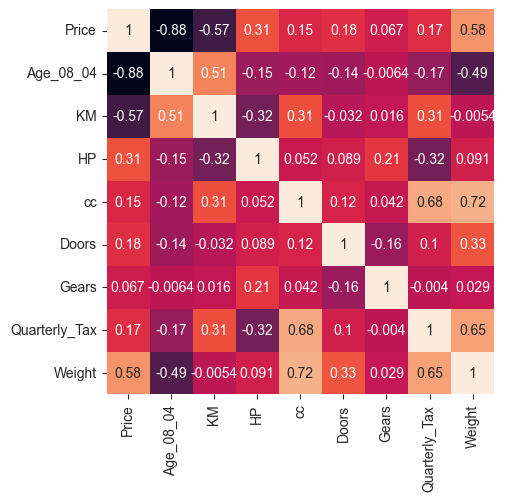

In [271]:
# Correlation Coefficient
plt.figure(figsize=(5,5))
sns.heatmap(data=data.corr(),cbar=False,annot=True);

In [272]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [273]:
# Rename Columns
data.rename(columns={'Age_08_04':'Age', 'Quarterly_Tax':'Tax'}, inplace=True)
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [274]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Tax', 'Weight'], dtype='object')

In [275]:
# Find VIF Values to check how significant these variables are 
# for VIF > 20 : That variable is not significant and we will not nclude that variable in our model

var = ['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Tax', 'Weight']
vif = []
for i in var:
    rsq = smf.ols(i+'~'+'+'.join([str(e) for e in var if e!=i]), data=data).fit().rsquared
    vif.append(1/(1-rsq))

vif_df = pd.DataFrame({'variables':var,'VIF':vif}).sort_values('VIF')
#vif_df.sort_values('VIF')
vif_df

# here all the variables are significant

,variables,VIF
5,Gears,1.103574
4,Doors,1.224716
2,HP,1.606203
1,KM,1.909277
0,Age,2.065180
6,Tax,2.942795
3,cc,3.227233
7,Weight,4.005009


In [276]:
# Correlation Coefficient of each column with target (i.e. Price) column.

for i in range(0,9):
    print(f"{data.columns[i]}   : {np.round(data['Price'].corr(data[data.columns[i]]),2)}")

Price   : 1.0
Age   : -0.88
KM   : -0.57
HP   : 0.31
cc   : 0.15
Doors   : 0.18
Gears   : 0.07
Tax   : 0.17
Weight   : 0.58


### Model building

In [277]:
# We will make model by adding variable in decreasing correlation coefficient 


model1 = smf.ols('Price~Age',data=data).fit()
model2 = smf.ols('Price~Age+Weight',data=data).fit()
model3 = smf.ols('Price~Age+KM+Weight',data=data).fit()
model4 = smf.ols('Price~Age+KM+HP+Weight',data=data).fit()
model5 = smf.ols('Price~Age+KM+HP+Doors+Weight',data=data).fit()
model6 = smf.ols('Price~Age+KM+HP+Doors+Tax+Weight',data=data).fit()
model7 = smf.ols('Price~Age+KM+HP+cc+Doors+Tax+Weight',data=data).fit()
model8 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=data).fit()

In [279]:
# Comapre aic,and r_square value of each model
# We need a model with features having : high r square value and less AIC value

models = ['Age', 'Age+Weight','Age+KM+Weigh', 'Age+KM+HP+Weight', 'Age+KM+HP+Doors+Weight', 'Age+KM+HP+Doors+Tax+Weight', 'Age+KM+HP+cc+Doors+Tax+Weight', 'Age+KM+HP+cc+Doors+Gears+Tax+Weight' ]
aic = [model1.aic, model2.aic, model3.aic, model4.aic, model5.aic, model6.aic, model7.aic, model8.aic]
rsquared = [model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared,model8.rsquared]
adj_rsquared = [model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj,model6.rsquared_adj,model7.rsquared_adj,model8.rsquared_adj]

pd.DataFrame({'models':models,'aic':aic,'rsquared':rsquared,'adj_rsquared':adj_rsquared})

# model with all the varibles are significant

,models,aic,rsquared,adj_rsquared
0,Age,25213.601952,0.777564,0.777408
1,Age+Weight,25014.306904,0.806809,0.806538
2,Age+KM+Weigh,24644.851400,0.851058,0.850744
3,Age+KM+HP+Weight,24509.069998,0.864757,0.864377
4,Age+KM+HP+Doors+Weight,24508.427875,0.865007,0.864533
5,Age+KM+HP+Doors+Tax+Weight,24510.223287,0.865027,0.864457
6,Age+KM+HP+cc+Doors+Tax+Weight,24384.991246,0.876532,0.875924
7,Age+KM+HP+cc+Doors+Gears+Tax+Weight,24379.844325,0.877149,0.876456


##### We will use model8

### Model validation

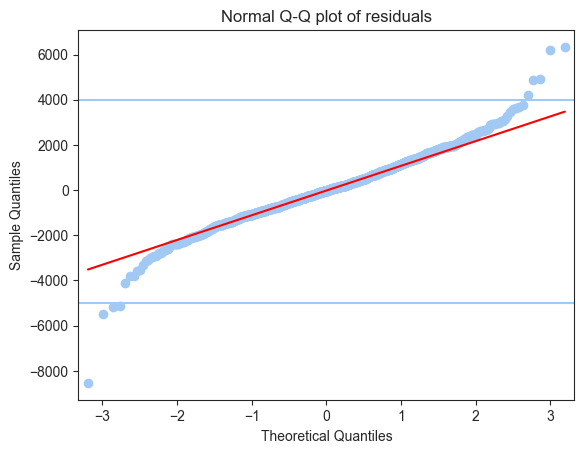

In [280]:
import statsmodels.api as sm
qqplot = sm.qqplot(model8.resid, line='q');
plt.title("Normal Q-Q plot of residuals");
plt.axhline(y = 4000)
plt.axhline(y = -5000)

In [281]:
np.where(model8.resid<-5000)

(array([186, 187, 595, 648], dtype=int64),)

In [282]:
np.where(model8.resid > 4000)

(array([ 121,  143,  167,  517, 1050], dtype=int64),)

In [283]:
data[data.index.isin([121,  143,  167,  517, 1050, 186, 187, 595, 648])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
121,19950,19,51099,90,2000,5,5,234,1255
143,18500,16,20629,110,1600,4,5,85,1090
167,20950,14,5278,110,1600,4,5,85,1150
187,9500,38,180638,90,2000,4,5,210,1160
517,10000,56,52000,97,1400,3,5,69,1025
595,10500,56,19313,97,1400,3,5,69,1025
648,8000,64,116000,86,1300,5,5,69,1045
1050,8500,69,197501,72,2000,5,5,185,1135


### Model deletion diagonistic
#### Deecting infuencers/Outliers

In [284]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model8.get_influence() # this method will return two values : cook's 
(c, _)= model_influence.cooks_distance # we don't nedd p values so we placed _ here

Text(0, 0.5, "cook's distance")

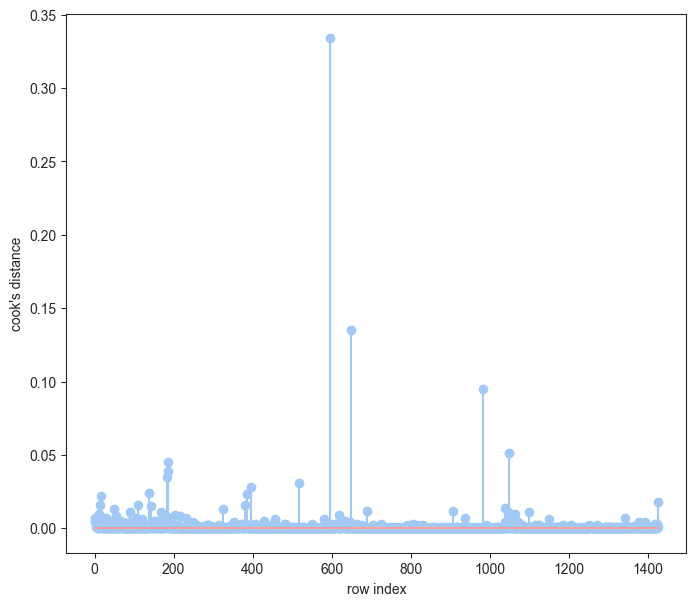

In [285]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(8,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("row index")
plt.ylabel("cook's distance")

In [286]:
np.argmax(c),np.max(c) 

(595, 0.3340426797142437)

In [311]:
data2 = data.drop(data.index[[121, 143, 167, 517, 1050, 186, 187, 595, 648]],axis=0)

### Build new mode with updated data (data2)

In [314]:
model_new = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=data2).fit()
print('rsquared: ',model_new.rsquared)
print('adjusted rsquared: ', model_new.rsquared_adj)
print('aic: ',model_new.aic)

rsquared:  0.8907449507843759
adjusted rsquared:  0.8901250639803155
aic:  24014.817109771157


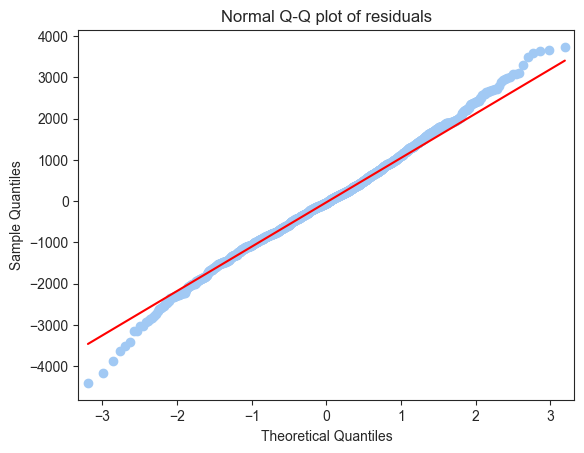

In [315]:
import statsmodels.api as sm
qqplot = sm.qqplot(model_new.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

Text(0, 0.5, "cook's distance")

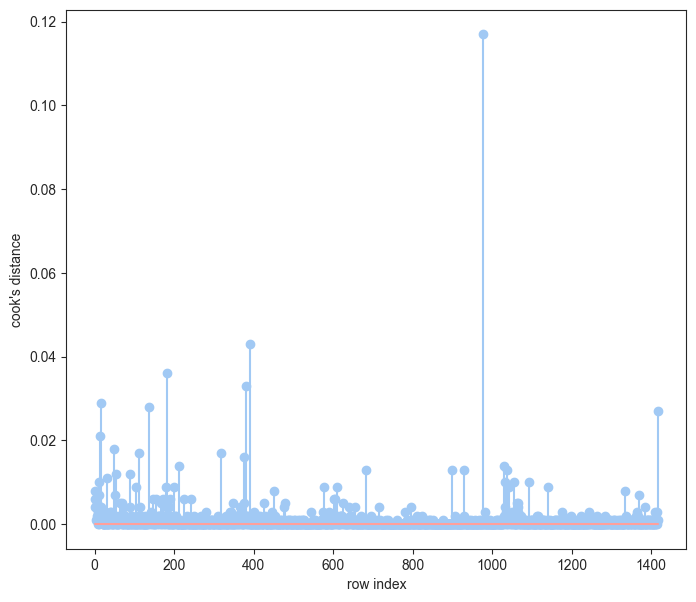

In [316]:
model_new_influence = model_new.get_influence() # this method will return two values : cook's 
(c_new, _)= model_new_influence.cooks_distance # we don't nedd p values so we placed _ here

# plot the influencers values using stem plot
fig = plt.subplots(figsize=(8,7))
plt.stem(np.arange(len(data2)),np.round(c_new,3))
plt.xlabel("row index")
plt.ylabel("cook's distance")

In [321]:
np.argmax(c_new), np.max(c_new)

(976, 0.11681568796119046)

In [326]:
data2[data2.index.isin([976])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
976,9900,59,46929,86,1300,3,5,69,1025


In [327]:
data3 = data2.drop(data2.index[976],axis=0)

### Building new model with updated data (data3)

In [328]:
model_new1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=data3).fit()
print('rsquared: ',model_new1.rsquared)
print('adjusted rsquared: ', model_new1.rsquared_adj)
print('aic: ',model_new1.aic)


rsquared:  0.8914683905980512
adjusted rsquared:  0.8908521713821423
aic:  23988.86110992533


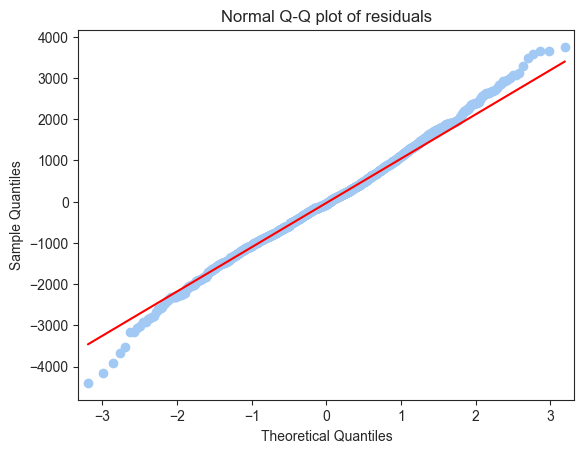

In [330]:

qqplot = sm.qqplot(model_new1.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

Text(0, 0.5, "cook's distance")

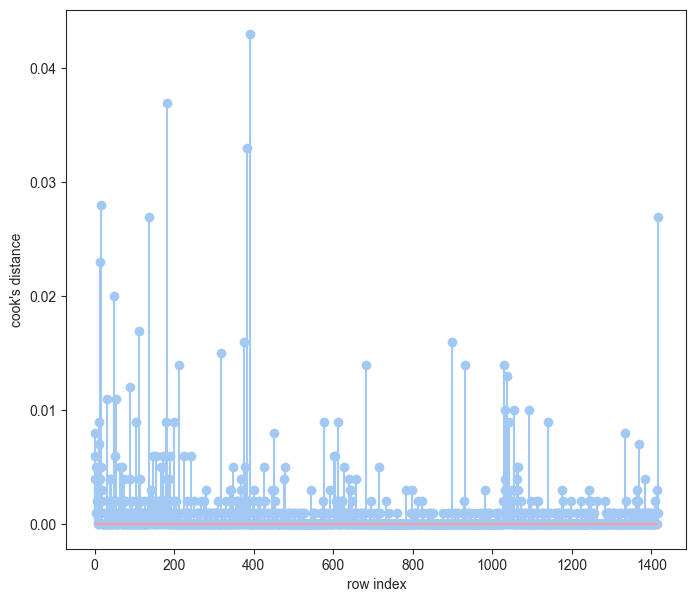

In [329]:
model_new1_influence = model_new1.get_influence() # this method will return two values : cook's 
(c_new1, _)= model_new1_influence.cooks_distance # we don't nedd p values so we placed _ here

# plot the influencers values using stem plot
fig = plt.subplots(figsize=(8,7))
plt.stem(np.arange(len(data3)),np.round(c_new1,3))
plt.xlabel("row index")
plt.ylabel("cook's distance")

### My final model is model_new1

#### Residual Plot for Homoscadasticity

Text(0, 0.5, 'Standardized residual values')

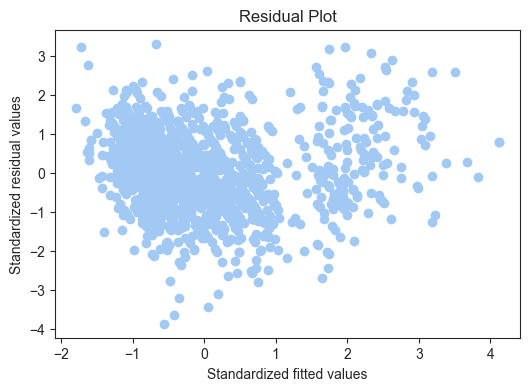

In [333]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model_new1.fittedvalues), get_standardized_values(model_new1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

#### Residual vs Regressor

In [336]:
data3.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Tax', 'Weight'], dtype='object')

eval_env: 1


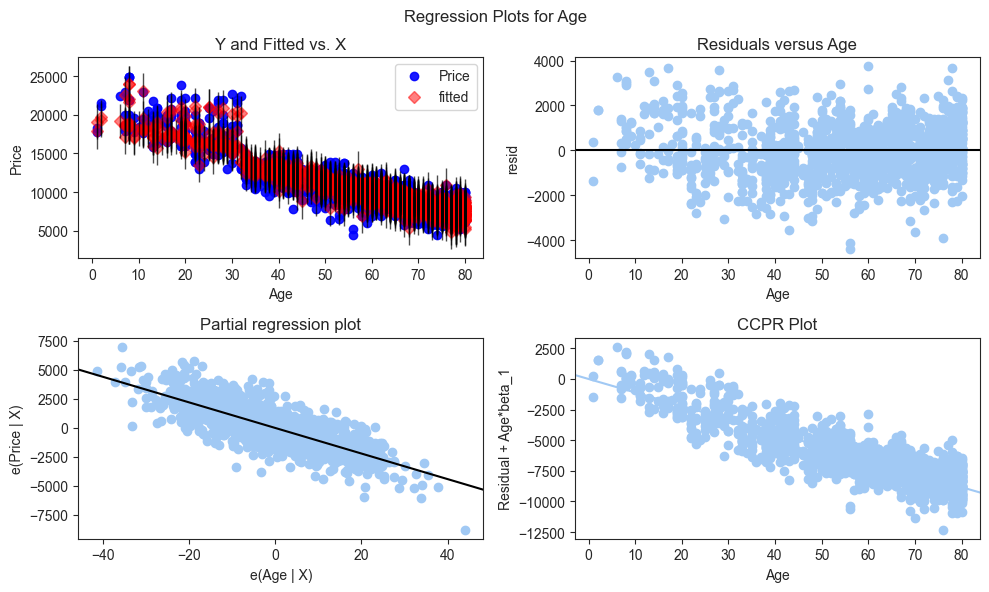

In [335]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model_new1,'Age',fig=fig)

eval_env: 1


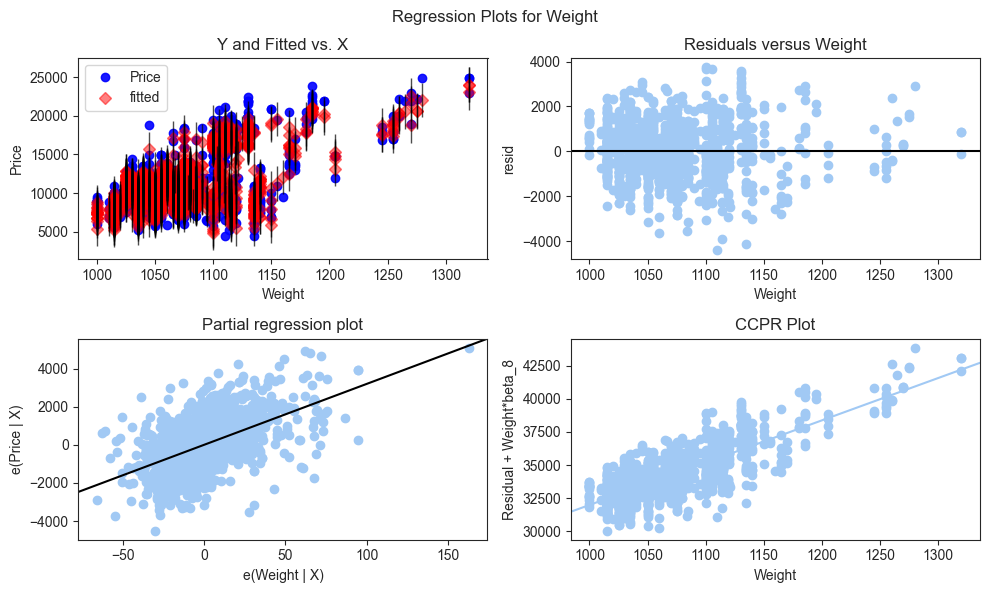

In [338]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model_new1,'Weight',fig=fig)

eval_env: 1


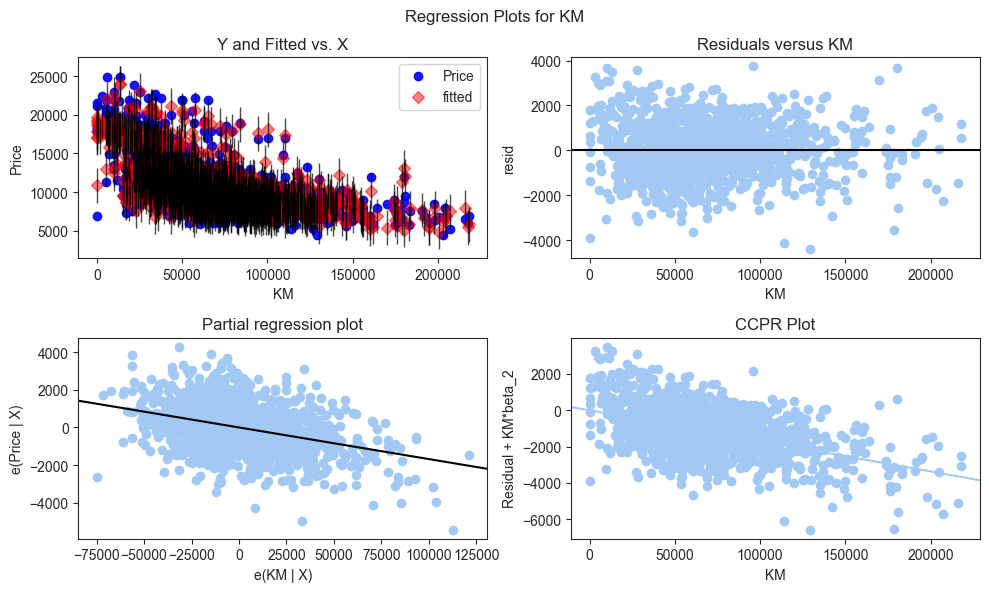

In [337]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model_new1,'KM',fig=fig)

eval_env: 1


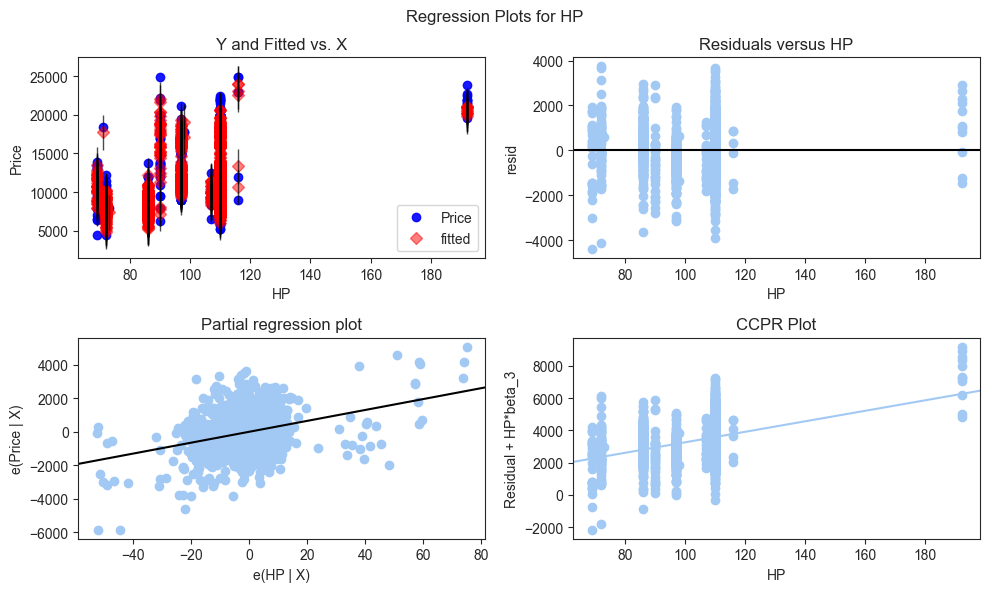

In [339]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model_new1,'HP',fig=fig)